In [1]:
# Some imports
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import os
import json
import seaborn as sns

In [18]:
url = 'https://stats.nba.com/stats/shotchartdetail'

def scrape_stats(url):
    try:
        response = requests.get(url, params=features, headers=headers)
        if response.status_code == 200:
            content = json.loads(response.content)
            return content
        return None
    except ConnectionError:
        return None

headers = {
		'Host': 'stats.nba.com',
		'Connection': 'keep-alive',
		'Accept': 'application/json, text/plain, */*',
		'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.130 Safari/537.36',
		'Referer': 'https://stats.nba.com/',
		"x-nba-stats-origin": "stats",
		"x-nba-stats-token": "true",
		'Accept-Encoding': 'gzip, deflate, br',
		'Accept-Language': 'en-US,en;q=0.9',
	}

features = {
	'ContextMeasure': 'FGA',
	'LastNGames': 0,
	'LeagueID': '00',
	'Month': 0,
	'OpponentTeamID': 0,
	'Period': 0,
	'PlayerID': 203954, # Joe Embiid's ID
	'SeasonType': 'Regular Season',
	'TeamID': 0,
	'VsDivision': '',
	'VsConference': '',
	'SeasonSegment': '',
	'Season': '2020-21',
	'RookieYear': '',
	'PlayerPosition': '',
	'Outcome': '',
	'Location': '',
	'GameSegment': '',
	'GameId': '',
	'DateTo': '',
	'DateFrom': ''
}


response = requests.get(url, params=features, headers=headers)
content = json.loads(response.content)

# transform contents into df
results = content['resultSets'][0]
headers = results['headers']
rows = results['rowSet']
df = pd.DataFrame(rows)
df.columns = headers

# write to Curry's csv file
df.to_csv('embiid.csv', index=False)

In [19]:
# Read data 
Embiid_data = pd.read_csv("embiid.csv")
# Clean the data, delete the null variables
Embiid_data = Embiid_data[Embiid_data['SHOT_MADE_FLAG'].notnull()]
Embiid_data.head() # View the first 5 rows

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,Shot Chart Detail,22000013,7,203954,Joel Embiid,1610612755,Philadelphia 76ers,1,11,43,...,Center(C),8-16 ft.,14,-4,147,1,0,20201223,PHI,WAS
1,Shot Chart Detail,22000013,48,203954,Joel Embiid,1610612755,Philadelphia 76ers,1,8,1,...,Center(C),Less Than 8 ft.,2,-2,21,1,1,20201223,PHI,WAS
2,Shot Chart Detail,22000013,58,203954,Joel Embiid,1610612755,Philadelphia 76ers,1,6,45,...,Right Side(R),8-16 ft.,15,94,120,1,0,20201223,PHI,WAS
3,Shot Chart Detail,22000013,83,203954,Joel Embiid,1610612755,Philadelphia 76ers,1,4,56,...,Left Side(L),8-16 ft.,10,-103,34,1,1,20201223,PHI,WAS
4,Shot Chart Detail,22000013,95,203954,Joel Embiid,1610612755,Philadelphia 76ers,1,4,13,...,Center(C),16-24 ft.,20,9,200,1,1,20201223,PHI,WAS


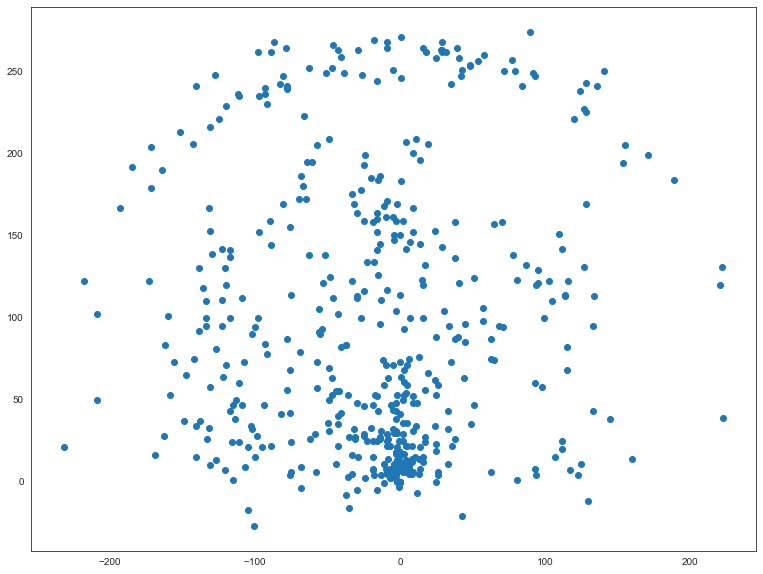

In [24]:
# Plot Curry's shot details
sns.set_style("white")
sns.set_color_codes()
plt.figure(figsize=(13,10))
plt.scatter(Embiid_data.LOC_X, Embiid_data.LOC_Y)
plt.show()

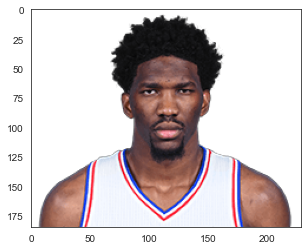

In [21]:
import urllib.request
# The 1st argument as the website link and the 2nd argument tells urlretrieve to scrape
# Curry's picture
pic = urllib.request.urlretrieve("http://stats.nba.com/media/players/230x185/203954.png",
                                "203954.png")

# urlretrieve returns Curry's picture as the first element 
# imread reads Curry's picure as a then I use the matplotlib to plot it
embiid = plt.imread(pic[0])

# plot Curry's picture
plt.imshow(embiid)
plt.show()

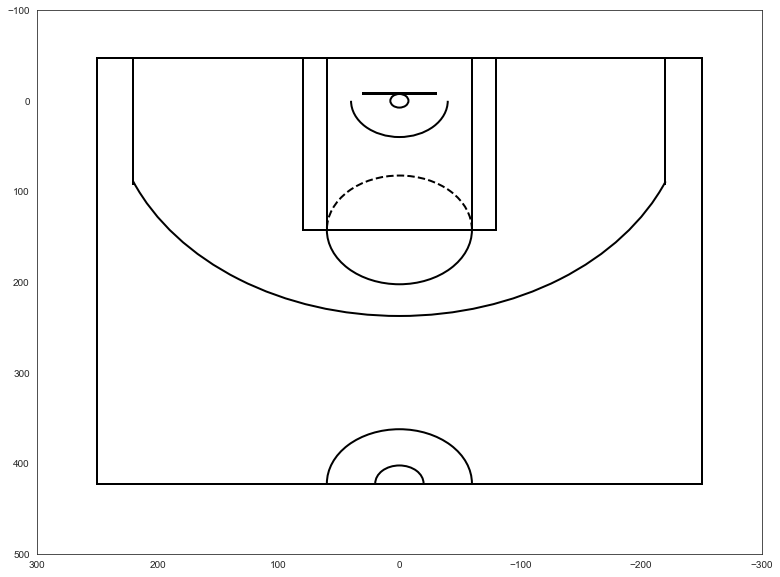

In [22]:
# Draw the basketball court
from matplotlib.patches import Circle, Rectangle, Arc
def draw_bball_court(ax=None, color='black', lw=2, outer_lines=False):
    # get current one if an axes object isn't provided to plot onto 
    if ax is None:
        ax = plt.gca()
    # Draw all the other parts of the NBA basketball court
    # Draw the basketball hoop. The hoop's radius value is 7.5"
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)
    # Draw the backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)
    # Draw the paint area outer box of the paint, width is 16feet, height is 19
    outbox = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color, fill=False)
    # Draw the inner box of the paint
    inbox = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color, fill=False)
    # Draw free throw top outline
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180, linewidth=lw, color=color, fill=False)
    # Draw free throw bottom outline
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0, linewidth=lw, color=color, linestyle='dashed')
    # Draw the restricted Zone
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw, color=color)
    # Draw the 3-point line. Draw the 3-point sidelines
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw, color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # Put the numbers make it lineup with three point lines.
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw, color=color)
    # Draw the center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0, linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0, linewidth=lw, color=color)
    # List of the parts on the court to be plotted
    court_elements = [hoop, backboard, outbox, inbox, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]
    if outer_lines:
        # Draw the half court line, baseline and bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw, color=color, fill=False)
        court_elements.append(outer_lines)
    # Put all the other parts onto the axes
    for element in court_elements:
        ax.add_patch(element)
    return ax

plt.figure(figsize=(13,10))
draw_bball_court(outer_lines=True)
plt.xlim(300,-300)
plt.ylim(500,-100)
plt.show()

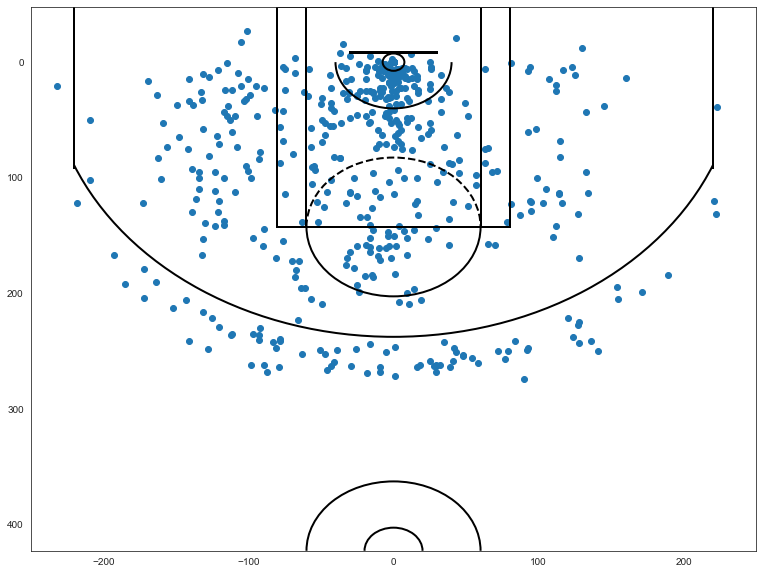

In [25]:
plt.figure(figsize=(13,10))
plt.scatter(Embiid_data.LOC_X, Embiid_data.LOC_Y)
draw_bball_court()
# Adjust plot limits to the court I just draw
plt.xlim(-250,250)
plt.ylim(422.5, -47.5)
# Plot Curry's shot data onto the court
plt.show()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:1181: UserWarning: The following kwargs were not used by contour: 'stat_func'
  cset = contour_func(


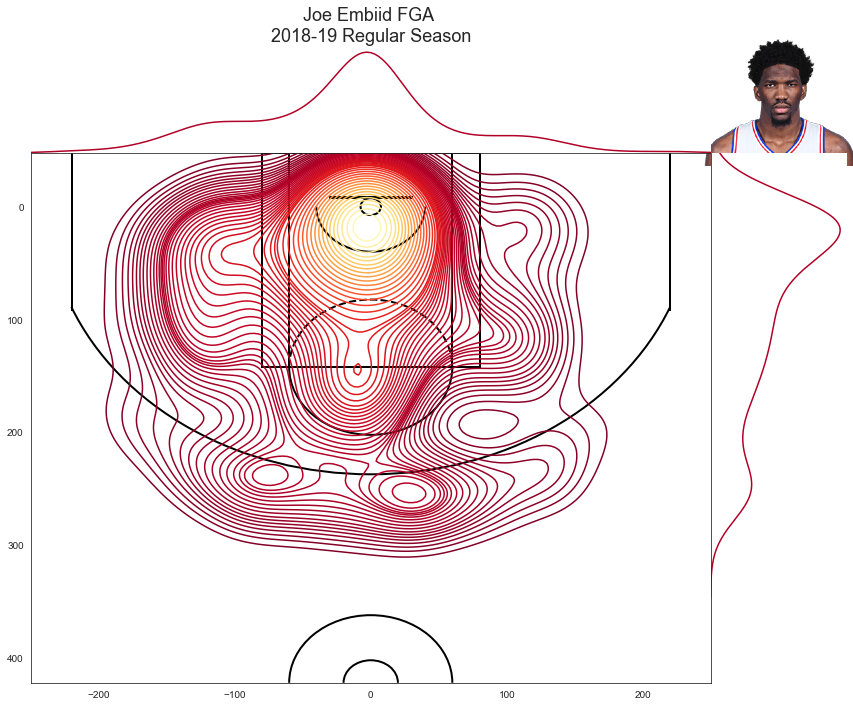

In [26]:
from matplotlib.offsetbox import OffsetImage

# create jointplot
# get the colormap for the plot
cmap=plt.cm.YlOrRd_r 
joint_shot_chart = sns.jointplot(Embiid_data.LOC_X, Embiid_data.LOC_Y, stat_func=None,
                                 kind='kde', space=0, color=cmap(0.1),
                                 cmap=cmap, n_levels=50)  # n_levels defines 50 contour lines for the plot

joint_shot_chart.fig.set_size_inches(13,10)

ax = joint_shot_chart.ax_joint
draw_bball_court(ax)
ax.set_xlim(-250,250)
ax.set_ylim(422.5, -47.5)

# Get rid of axis labels and tick marks
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelbottom='off', labelleft='off')

# Add a title
ax.set_title('Joe Embiid FGA \n2018-19 Regular Season', y=1.2, fontsize=18)

# Adjust the picture before adding it
pic = OffsetImage(embiid, zoom=0.7) # adjust the picture to fit the plot by using zoom
pic.set_offset((700,540)) # set the picture's position
# Add Curry's picture onto the plot
ax.add_artist(pic)

plt.show()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


AttributeError: 'PolyCollection' object has no property 'stat_func'

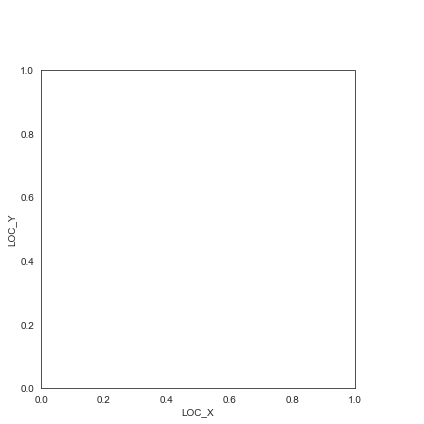

In [27]:
# create jointplot
# get the colormap for the plot
cmap=plt.cm.gist_heat_r
joint_shot_chart = sns.jointplot(Embiid_data.LOC_X, Embiid_data.LOC_Y, stat_func=None,
                                 kind='hex', space=0, color=cmap(0.2), cmap=cmap)

joint_shot_chart.fig.set_size_inches(13,10)

ax = joint_shot_chart.ax_joint
draw_bball_court(ax)

ax.set_xlim(-250,250)
ax.set_ylim(422.5, -47.5)

# Get rid of axis labels and tick marks
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelbottom='off', labelleft='off')

# Add a title
ax.set_title('Joe Embiid FGA \n2018-19 Regular Season', 
             y=1.2, fontsize=18)

# Adjust the picture before adding it
pic = OffsetImage(embiid, zoom=0.7) # adjust the picture to fit the plot by using zoom
pic.set_offset((700,540)) # set the picture's position
# Add Curry's picture onto the plot
ax.add_artist(pic)

plt.show()


In [3]:
url = 'https://stats.nba.com/stats/shotchartdetail'

def scrape_stats(url):
    try:
        response = requests.get(url, params=features, headers=headers)
        if response.status_code == 200:
            content = json.loads(response.content)
            return content
        return None
    except ConnectionError:
        return None

headers = {
		'Host': 'stats.nba.com',
		'Connection': 'keep-alive',
		'Accept': 'application/json, text/plain, */*',
		'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.130 Safari/537.36',
		'Referer': 'https://stats.nba.com/',
		"x-nba-stats-origin": "stats",
		"x-nba-stats-token": "true",
		'Accept-Encoding': 'gzip, deflate, br',
		'Accept-Language': 'en-US,en;q=0.9',
	}

features = {
	'ContextMeasure': 'FGA',
	'LastNGames': 0,
	'LeagueID': '00',
	'Month': 0,
	'OpponentTeamID': 0,
	'Period': 0,
	'PlayerID': 203507, # Stephen Curry's ID
	'SeasonType': 'Regular Season',
	'TeamID': 0,
	'VsDivision': '',
	'VsConference': '',
	'SeasonSegment': '',
	'Season': '2018-19',
	'RookieYear': '',
	'PlayerPosition': '',
	'Outcome': '',
	'Location': '',
	'GameSegment': '',
	'GameId': '',
	'DateTo': '',
	'DateFrom': ''
}


response = requests.get(url, params=features, headers=headers)
content = json.loads(response.content)

# transform contents into df
results = content['resultSets'][0]
headers = results['headers']
rows = results['rowSet']
df = pd.DataFrame(rows)
df.columns = headers

# write to Giannis's csv file
df.to_csv('giannis.csv', index=False)

In [4]:
# Read data 
Giannis_data = pd.read_csv("giannis.csv")
Giannis_data = Giannis_data[Giannis_data['SHOT_MADE_FLAG'].notnull()]
Giannis_data.head()

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,Shot Chart Detail,21800003,39,203507,Giannis Antetokounmpo,1610612749,Milwaukee Bucks,1,8,35,...,Center(C),Less Than 8 ft.,3,-3,34,1,0,20181017,CHA,MIL
1,Shot Chart Detail,21800003,55,203507,Giannis Antetokounmpo,1610612749,Milwaukee Bucks,1,7,52,...,Center(C),Less Than 8 ft.,1,6,10,1,1,20181017,CHA,MIL
2,Shot Chart Detail,21800003,59,203507,Giannis Antetokounmpo,1610612749,Milwaukee Bucks,1,7,26,...,Center(C),Less Than 8 ft.,2,-14,20,1,0,20181017,CHA,MIL
3,Shot Chart Detail,21800003,70,203507,Giannis Antetokounmpo,1610612749,Milwaukee Bucks,1,6,19,...,Left Side Center(LC),24+ ft.,26,-131,235,1,0,20181017,CHA,MIL
4,Shot Chart Detail,21800003,150,203507,Giannis Antetokounmpo,1610612749,Milwaukee Bucks,1,0,53,...,Center(C),Less Than 8 ft.,4,36,33,1,0,20181017,CHA,MIL


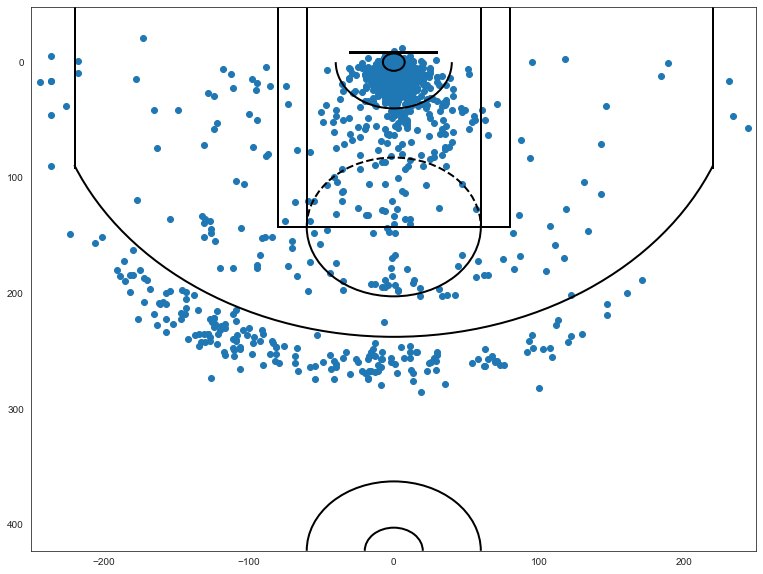

In [32]:
plt.figure(figsize=(13,10))
plt.scatter(Giannis_data.LOC_X, Giannis_data.LOC_Y)
draw_bball_court()
# Adjust plot limits to just fit in half court
plt.xlim(-250,250)
plt.ylim(422.5, -47.5)
# plot the shot details onto the court
plt.show()

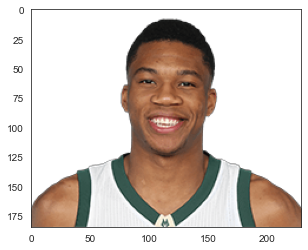

In [33]:
import urllib.request
# The 1st argument as the website link and the 2nd argument tells urlretrieve to scrape
# Giannis's picture
pic = urllib.request.urlretrieve("http://stats.nba.com/media/players/230x185/203507.png",
                                "203507.png")

# urlretrieve returns Giannis's picture as the first element 
# imread reads Giannis's picure as a then I use the matplotlib to plot it
giannis = plt.imread(pic[0])

# plot Giannis's picture
plt.imshow(giannis)
plt.show()

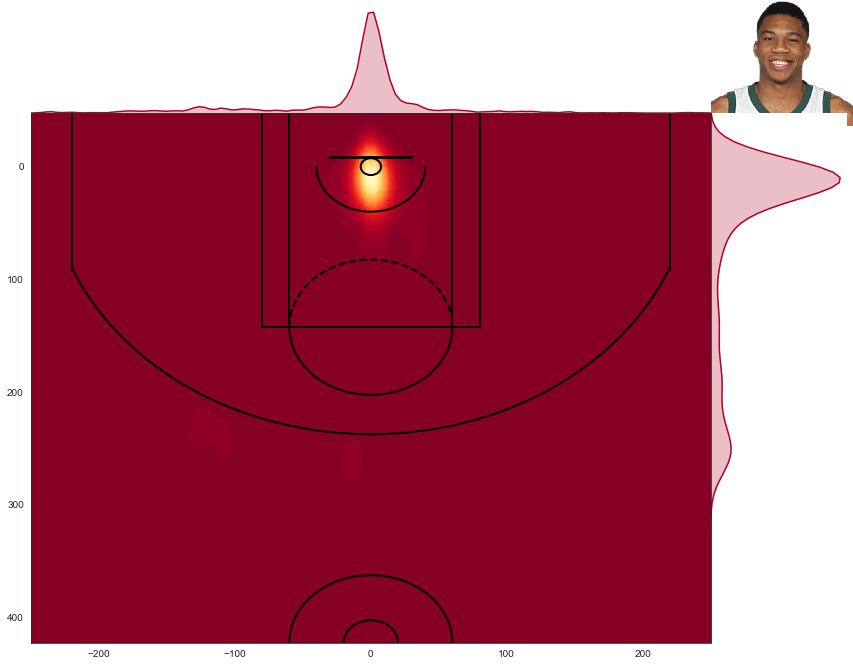

In [35]:
from matplotlib.offsetbox import  OffsetImage

# create jointplot

# get the colormap for the main kde plot
# Note extract a color from cmap to use for the plots that lie on the side and top axes
cmap=plt.cm.YlOrRd_r 
joint_shot_chart = sns.jointplot(Giannis_data.LOC_X, Giannis_data.LOC_Y, stat_func=None,kind='kde', space=0, color=cmap(0.1),cmap=cmap, n_levels=50) # n_levels defines 50 contour lines for the plot

joint_shot_chart.fig.set_size_inches(13,10)

ax = joint_shot_chart.ax_joint
draw_bball_court(ax)

# Adjust the axis limits and orientation of the plot in order
# to plot half court, with the hoop by the top of the plot
ax.set_xlim(-250,250)
ax.set_ylim(422.5, -47.5)

# Get rid of axis labels and tick marks
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelbottom='off', labelleft='off')

# Add a title
ax.set_title('Giannis Antetokounmpo FGA \n2018-19 Regular Season', 
             y=1.2, fontsize=18)

# Add Giannis's image to the top right
pic = OffsetImage(giannis, zoom=0.7) # adjust the picture to fit the plot by using zoom
pic.set_offset((700,540)) # set the picture's position
# Add Giannis's picture onto the plot
ax.add_artist(pic)

plt.show()

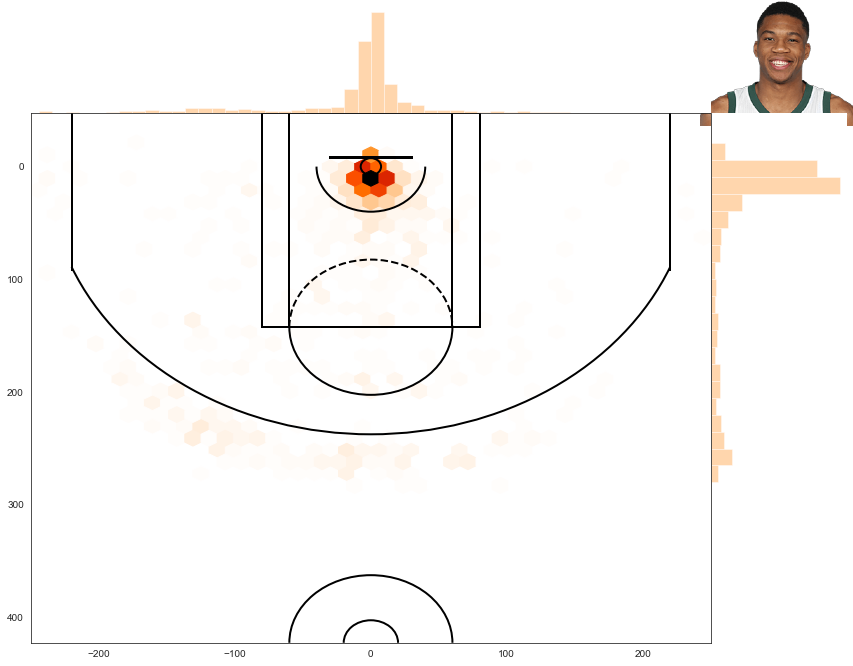

In [16]:
cmap=plt.cm.gist_heat_r
joint_shot_chart = sns.jointplot(Giannis_data.LOC_X, Giannis_data.LOC_Y, stat_func=None,kind='hex', space=0, color=cmap(.2), cmap=cmap)

joint_shot_chart.fig.set_size_inches(13,10)

# A joint plot has 3 Axes, the first one called ax_joint 
# is the one we want to draw our court onto 
ax = joint_shot_chart.ax_joint
draw_bball_court(ax)

# Adjust the axis limits and orientation of the plot in order
# to plot half court, with the hoop by the top of the plot
ax.set_xlim(-250,250)
ax.set_ylim(422.5, -47.5)

# Get rid of axis labels and tick marks
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelbottom='off', labelleft='off')

# Add a title
ax.set_title('Giannis Antetokounmpo FGA \n2018-19 Regular Season',y=1.2, fontsize=18)

# Add Giannis's image to the top right
pic = OffsetImage(giannis, zoom=0.7) # adjust the picture to fit the plot by using zoom
pic.set_offset((700,540)) # set the picture's position
# Add Giannis's picture onto the plot
ax.add_artist(pic)

plt.show()


In [17]:
# From the graphs we can see that majority of Giannis's shot are in the Paint. He is very efficiency player in paint.